# Final project

_Maxwell Lynch_

## Introduction

When looking at distant solar systems, impossible to look directly look at planets. Telescopes can only pick up on the light from a distant star and not the light reflecting off planets. In order to detect planets orbiting a star, observers instead look at the intensity of the light of the star. When an object passes between the star and an observer, the observer will notice a drop in the intensity, or brightness, of the star. A periodic drop in brightness is indicative of an object orbiting the star because the orbits of objects are periodic. Therefore, observing the brightness of stars may be used to detect exoplanets. This is known as the transit method of detection.

The general public can request data from NASA’s projects for their own analysis. NASA also provides resources to automate detection in this data, the program is called  EXOTIC. The Westminster physics department has a telescope capable of collecting data for exoplanet detection. However, the data is not correctly formatted for automation using the tools NASA provides.

This project perpares data collected using Westminster's evscope and automates part of the analysis. Once the user has set up the right environment, this program will first duplicate the files so the originals are not modified. Next, the copied files are formatted properly. Then, using an external tool, more processing is done to the files. Finally, this program opens the EXOTIC program so the user may begin to analyze their files.

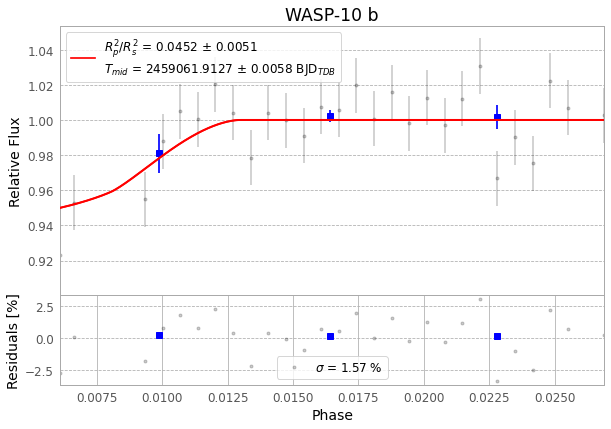

Above is an lightcurve generated using EXOTIC software. The dip shows the transit of the planet WASP-10 b in front its host star WASP-10.

## How to use

### Initial setup

1. Create a directory on your desktop named "EXOTIC".

2. Move the directory of files you want to format into the "EXOTIC" directory

3. Copy all appropriate dark FITS files into a directory (e.g. darks/)

4. Copy all appropriate science FITS files into another directory (e.g. science/)

5. Make a copy of this text file, "README.txt", and move it into the directory from step 2. You will need to make sure the copied file has the same name (i.e. "README.txt" not "README_copy.txt"). The file path of the duplicated README file should be "~/Desktop/Exotic/Ex_Dir/README.txt".

6. Create another directory in "EXOTIC" called "Tools"

7. Download thies file and copy it into "Tools"

8. Download zip file from Mike Primm's "evtools" github and unzip in "Tools". It may be helpful to read through 'README.md' at this link: https://github.com/mikeprimm/evtools/tree/main

9. Move this file into evtools directory

10. Replace variable descriptors with variable values in "README.txt"

11. Install and import the necessary libraries. This step will create a virtual environment for EXOTIC and activate it, which may take some time.

12.  Run code to define the conversion class with all the necessary functions.

13. Create a class. This will prompt the user to enter the name of the directory _within_ "EXOTIC" that holds the files to be formatted

14. Once the code runs, the EXOTIC program will open and the user may begin to analyze their data.

## Example usage

```
input:
TEST = Conversion()

output:
Please carefully read through all directions
Enter the name of the directory you want to format:

input:
EXOTIC Test

output:
Directory found at: /Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test
24 files copied to /Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_copy and path class variable updated
2025-05-06 21:50:48,244 INFO - args=Namespace(darks='/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_copy/darks', science='/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_copy/science', darkflats=None, flats=None, output='/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_output', target=None, red=False, green=False, blue=False, gray=False, irpass=False, bin=False, stacktime=None, stackmin=None, supersample=None, skip=None)
2025-05-06 21:50:48,244 INFO - Produce green channel FITS files
2025-05-06 21:50:48,245 INFO - Processing 6 darks
ERROR:root:Error: file snj5g6_2023-02-17T07-10-39.707_Science_Darkframe_0.json
ERROR:root:Error: file snj5g6_2023-02-17T07-10-43.677_Science_Darkframe_1.json
ERROR:root:Error: file snj5g6_2023-02-17T07-10-47.647_Science_Darkframe_2.json
2025-05-06 21:50:48,752 INFO - Bayer pattern=RGGB
INFO:processExoplanetData:Bayer pattern=RGGB
<frozen importlib._bootstrap>:228: FutureWarning: 
The `sep-pjw` package has reverted to the original `sep` package name. Bug
fixes and additional enhancements will not be released for `sep-pjw`, and
users of this package should update their dependencies to `sep>=1.4.0`.

2025-05-06 21:51:36,654 INFO - Accumulated 23 frames from 59992.10306304414 to 59992.10411988432 into frame 0
INFO:processExoplanetData:Accumulated 23 frames from 59992.10306304414 to 59992.10411988432 into frame 0
2025-05-06 21:51:36,960 INFO - Processed 24 out of 24 files into destination '/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_output'
INFO:processExoplanetData:Processed 24 out of 24 files into destination '/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_output'
processExoplanetData complete. Continuing to run EXOTIC GUI
Thinking ... DONE!

SUCCESS: Valid Python version 3.9.13 detected!
```
The above output may take a minute or so to generate. The error messages seen are related to the content of certain files and is normal. Once this whole chunk is output, EXOTIC will open in a separate window.

## Install and import packages

In [39]:
# Import python libraries
import os
import numpy as np
import scipy
import shutil

# Install, then impport astropy
!pip install astropy
import astropy.io
from astropy.io import fits

In [2]:
# Create a new virtual environment and activate it:
!conda create -n exotic python=3.10 -y
!conda activate exotic

# Install EXOTIC and its dependencies:
!pip install exotic

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 25.3.1

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=25.3.1



## Package Plan ##

  environment location: /Users/maxlynch/opt/anaconda3/envs/exotic

  added / updated specs:
    - python=3.10


The following NEW packages will be INSTALLED:

  bzip2              pkgs/main/osx-64::bzip2-1.0.8-h6c40b1e_6 
  ca-certificates    pkgs/main/osx-64::ca-certificates-2025.2.25-hecd8cb5_0 
  libffi             pkgs/main/osx-64::libffi-3.4.4-hecd8cb5_1 
  ncurses            pkgs/main/osx-64::ncurses-6.4-hcec6c5f_0 
  openssl            pkgs/main/osx-64::openssl-3.0.16-h184c1cd_0 
  pip                pkgs/main/noarch::pip-25.1-pyhc872135_2 
  python             pkgs/main/osx-64::python-3.10.16-hce00570_1 
  readline           pkgs/main/osx-64::readlin

In [40]:
#Verify the installation by running the following command
!python -c "import exotic"

In [51]:
class Conversion:
    
    def __init__(self):
        self.base_path = os.path.join(os.path.expanduser("~"), "Desktop", "EXOTIC") # Define a base path that navigates to a directory called 'EXOTIC' on the user's desktop
        print("Please carefully read through all directions") # Tell user to create the 'EXOTIC' directory and put everything in it
        self.run() # Call helper method 'run' that automates steps

    def run(self):
        self.find_data() # Find data
        if self.sci_path: # Run once self.dir_path is defined
            self.copy_data(self.sci_path) # Copy data
        if self.updated_dir_path: # Run once self.updated_dir_path is defined
            self.add_headers() # Add headers to files     
            
    # Find user-specified directory

    def find_dir(self, dir_name, path):
        for root, dirs, files in os.walk(path): # os.walk() generates the file names in a directory, it returns a 3-tuple (root,dirs,files)
            if dir_name in dirs: # dirs prints out sub-directories from root
                return os.path.join(root, dir_name) # Return path to science files directory if directory is in EXOTIC directory
        return None # Return nothing if no directory is found
    
    # Find data

    def find_data(self): # Take no parameters other than self
        dir_name = input("Enter the name of the directory you want to format: ") # User defines directory in EXOTIC to begin formatting
        self.dir_path = self.find_dir(dir_name, self.base_path) # Call self.find_dir, create a new variable for directory path

        if self.dir_path: # Proceed if self.find_dir returns a valid path
            print(f"Directory found at: {self.dir_path}") # Print a message if the user-specified directory is found
            self.sci_path = self.find_dir("science", self.dir_path) # Create a path variable for science directory
            self.dark_path = self.find_dir("darks", self.dir_path) # Create a path variable for darks directory
            
        else: # Proceed if self.find_dir returns nothing
            print("Directory not found. Please double-check the name and location.") # Print a message if the user-specified directory is not found
            self.find_data() # Try again
            
    # Copy data
    
    def copy_data(self, path): # takes self.sci_path as parameter
        
        self.updated_dir_path = self.dir_path + "_copy" # We don't want to touch the original data again, so make the copied directory the new class variable. The copied directory path is the reference directory path with "_copy" at the end
        self.updated_sci_path = self.updated_dir_path + "/science" # Make new path for science and darks directories
        self.updated_dark_path = self.updated_dir_path + "/darks"
        
        self.output_path = self.dir_path + "_output" # Make new path for output directory
        
        for path in [self.updated_dir_path, self.updated_sci_path, self.updated_dark_path, self.output_path]: # Loop through all new directory paths
            try:
                os.mkdir(path) # Make a copy directory for each path
            except FileExistsError:
                print("Copy directory already exists. Files will be overwritten if they have the same name.") # Print an error if the system returns FileExistsError

    
        for file in os.listdir(self.sci_path): # Loop over each file in the science directory
            old_file_path = os.path.join(self.sci_path, file) # Old path from original directory
            new_file_path = os.path.join(self.updated_sci_path, file) # New path from copied directory
            
            if os.path.isfile(old_file_path): # Continue if path leads to a file (by definition it does)
                shutil.copy2(old_file_path, new_file_path) # Use shutil.copy2 to create a copy of the file at the old location in the new location
                
        for file in os.listdir(self.dark_path): # Loop over each file in the darks directory
            old_file_path = os.path.join(self.dark_path, file) # Old path from original directory
            new_file_path = os.path.join(self.updated_dark_path, file) # New path from copied directory
            
            if os.path.isfile(old_file_path):  # Continue if path leads to a file (by definition it does)
                shutil.copy2(old_file_path, new_file_path) # Use shutil.copy2 to create a copy of the file
                
        print(f"{len(os.listdir(self.updated_sci_path))} files copied to {self.updated_dir_path} and path class variable updated") # Print a message when finished
        
    # Add headers to each file
    
    def add_headers(self): # Define function that takes self as a parameter
        
        # Dictionary of EXOTIC-required FITS headers
        headers = {
            # Required headers
            'DATE-OBS': 'Start date/time of observation (UTC, e.g., 2023-05-12T02:18:01.234)',
            'EXPTIME': 'Exposure time in seconds',
            'RA': 'Right Ascension of telescope pointing (hh:mm:ss or degrees)',
            'DEC': 'Declination of telescope pointing (dd:mm:ss or degrees)',
            'FILTER': 'Photometric filter used (e.g., V, R, I, Clear)',
            'OBJECT': 'Target object name (e.g., HAT-P-22)',
            'TELESCOP': 'Telescope name or ID',
            'INSTRUME': 'Instrument or CCD camera name',
            
            # Recommended (some needed for advanced use, these can be added back in when needed)
#             'GAIN': 'CCD gain in electrons per ADU',
#             'EGAIN': 'Alternate gain keyword',
#             'CCD-TEMP': 'CCD temperature during exposure',
#             'OBSERVER': 'Observer name or ID',
#             'XPIXSZ': 'Pixel size in microns (X direction)',
#             'YPIXSZ': 'Pixel size in microns (Y direction)',
#             'AIRMASS': 'Airmass at time of exposure',
#             'ALTITUDE': 'Altitude of telescope pointing',
#             'AZIMUTH': 'Azimuth of telescope pointing',
#             'READNOIS': 'Read noise of the CCD in electrons',
#             'DARKCURR': 'Dark current of the CCD in electrons/sec',
#             'MJD-OBS': 'Modified Julian Date of start of exposure',
#             'JD': 'Julian Date of start of exposure',
    
            # Mandatory FITS structural keywords (for sanity checks)
            'SIMPLE': 'FITS standard compliance flag',
            'BITPIX': 'Number of bits per data pixel',
            'NAXIS': 'Number of image dimensions',
            'NAXIS1': 'Image width in pixels',
            'NAXIS2': 'Image height in pixels'
        }
        
        saved_values = {} # Initialize a library of saved values
        
        readers = self.read(self.dir_path) # Get the headers from the README file
        
        for path in [self.updated_sci_path, self.updated_dark_path]: # Add headers to darks and science files
            
            for filename in os.listdir(path): # Loop through all files
                if not filename.endswith(".fits"): # Skip non-FITS files
                    continue

                file_path = os.path.join(path, filename) # Create a temporary file path for each file
                with fits.open(file_path, mode='update') as hdulist: 
                    header = hdulist[0].header
                    missing_headers = []

                    for key, description in headers.items():
                        if key not in header or header[key] == 'NA':
                            if key in saved_values:
                                header[key] = saved_values[key] # If a header is missing or has no value, but is in saved_values, update the header with value from saved_values
                            else:
                                header[key] = readers[key] # If a header is missing or has no value and is not in saved_values, it should be saved in the README. Use the appropriate value from the README for the header value
                                missing_headers.append(key) # Add header to the missing_headers list
                                saved_values[key] = header[key] # Update key in saved_values

                    if missing_headers:
                        print(f"Updated files with missing headers: {', '.join(missing_headers)}") # Print a message detailing how many headers were updates
                        
        self.processExoplanetData()
                    
    # Read in headers from README file
    
    def read(self, path): # that takes self.dir_path as parameter
        
        readers = {} # Initialize a library of headers
        
        readme_path = os.path.join(path, 'README.txt') # Create a variable for README file path
        
        try:
            with open(readme_path, 'r') as file: # Open the file in read mode

                for line in file: # Read each line in the file

                    if line.startswith('Object'): readers['OBJECT'] = line.partition('=')[2].strip() # Partition line containing 'OBJECT' from README file and only take the value
                    if line.startswith('Right'): readers['RA'] = line.partition('=')[2].strip() # Partition line containing 'RIGHT ASCENSION' from README file and only take the value
                    if line.startswith('Declination'): readers['DEC'] = line.partition('=')[2].strip() # Partition line containing 'DECLINATION' from README file and only take the value
                    if line.startswith('Filter'): readers['FILTER'] = line.partition('=')[2].strip() # Partition line containing 'FILTER' from README file and only take the value
        
        except FileNotFoundError:
            print("Cannot find 'README.txt' in the current directory.") # Print error if README file cannot be found
            
        
        return readers # Return library of headers
    
    # Run processExoplanetData, a python file from Mike Primm
    
    def processExoplanetData(self): # Take only self as a parameter
        
        !python processExoplanetData.py -d {self.updated_dark_path} -s {self.updated_sci_path} -o {self.output_path} # Shell command to run processExoplanetData, which takes self.updated_dark_path, self.updated_sci_path, and self.updated_dark_path
        
        print("processExoplanetData complete. Continuing to run EXOTIC GUI") # Print a message when done
        
        self.EXOTIC() # Call next step: running exotic
        
    # Run EXOTIC's graphical user interface (GUI):
    
    def EXOTIC(self): # Take only self as a parameter

        !exotic-gui # Shell command to run EXOTIC
        

In [54]:
Example = Conversion()

Please carefully read through all directions


Enter the name of the directory you want to format:  EXOTIC_Test


Directory found at: /Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test
Copy directory already exists. Files will be overwritten if they have the same name.
Copy directory already exists. Files will be overwritten if they have the same name.
Copy directory already exists. Files will be overwritten if they have the same name.
Copy directory already exists. Files will be overwritten if they have the same name.
24 files copied to /Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_copy and path class variable updated
2025-05-06 21:56:08,275 INFO - args=Namespace(darks='/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_copy/darks', science='/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_copy/science', darkflats=None, flats=None, output='/Users/maxlynch/Desktop/EXOTIC/EXOTIC_Test_output', target=None, red=False, green=False, blue=False, gray=False, irpass=False, bin=False, stacktime=None, stackmin=None, supersample=None, skip=None)
2025-05-06 21:56:08,275 INFO - Produce green channel FITS files
2025-05-06 21:56:08,275 

## Troubleshooting

Permission errors:
When the code to run processExoplanetData.py runs, it may encounter a permissions error. To resolve this error, open System Settings > Privacy & Security > Full Disk Access and give Terminal access to the disk. Run the code again and the error should be resolved.